# Group S
 
- António Carvalho - m20200642 
- Frederico Rodrigues - m20200583 
- Gonçalo Carvalho - m20200664 
- Manuel Borges - 

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Antonio\Anaconda3\envs\classdatamining\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Antonio\Anaconda3\envs\classdatamining\python.exe -m pip install --upgrade pip' command.


In [23]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score


In [4]:
%store -r datafe
datafe

,LeadTime,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,...,x10_ 484,x10_ 495,x10_ 509,x10_ 0,x11_Group,x11_Transient,x11_Transient-Party,x12_1,x12_2,x12_3
0,6,1,0,2,1,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,88,1,0,4,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,65,1,0,4,1,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,92,1,2,4,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100,2,0,2,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,23,30,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79326,102,31,2,5,3,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79327,34,31,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
79328,109,31,2,5,2,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
%store -r treshold1
%store -r treshold2
%store -r onlyDT
%store -r target

treshold1 = treshold1.tolist()
treshold2 = treshold2.tolist()

In [8]:
#heavily correlated variables
onlyDT.remove('ADRpp')
onlyDT.remove('TotalNights')

## Modeling

In [15]:
X = datafe[onlyDT]
y = target

# Provisional TrainTest Split
#X_train, X_val, y_train, y_val = train_test_split(datafe[onlyDT],target, test_size=0.25, random_state=42, stratify=target)

In [8]:
models = [("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
        ("DT_model", DecisionTreeClassifier(random_state=42)),
        ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
        ("SVC:model", SVC(kernel="rbf", C=0.025, probability=True)),
        ("NuSVC:model", NuSVC(probability=True)),
        ("MLP_model", MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',random_state=1)),
        ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

#split data for cross-validation
split = KFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
for name, model in models:
    # cross validation score for each model:
    cv_results = cross_val_score(model, 
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 3)
    max_score = round(max(cv_results), 3)
    mean_score = round(np.mean(cv_results), 3)
    std_dev = round(np.std(cv_results), 3)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

# Assessment

The type of split when comparing the models cannot be used when doing the ROC  curve. Therefore, we decided to do a different split, the train-test split.


In [6]:
# Provisional TrainTest Split
X_train, X_val, y_train, y_val = train_test_split(datafe[onlyDT],target, test_size=0.25, random_state=42, stratify=target)

In [19]:
rf_plus = RandomForestClassifier(random_state=42,n_jobs=-1)

rf_plus.fit(X_train, y_train)
y_val_pred=rf_plus.predict(X_val)
y_train_pred=rf_plus.predict(X_train)
cross_val_score(rf_plus,X_train,y_train,cv=split,scoring="accuracy",n_jobs=-1)

array([0.85521795, 0.85515058, 0.85885603, 0.85656538])

In [17]:
# Test set classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11521
           1       0.87      0.79      0.83      8270

    accuracy                           0.86     19791
   macro avg       0.86      0.85      0.86     19791
weighted avg       0.86      0.86      0.86     19791



In [18]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_val, y_val_pred), 
             index=pd.Index(y_train.unique(), name="True"), 
             columns=pd.Index(y_train.unique(), name="Pred"))

Pred,1,0
True,,
1,10524,997
0,1753,6517


Even though this gives us a different cross-validation score, the team decided to keep the RF model 

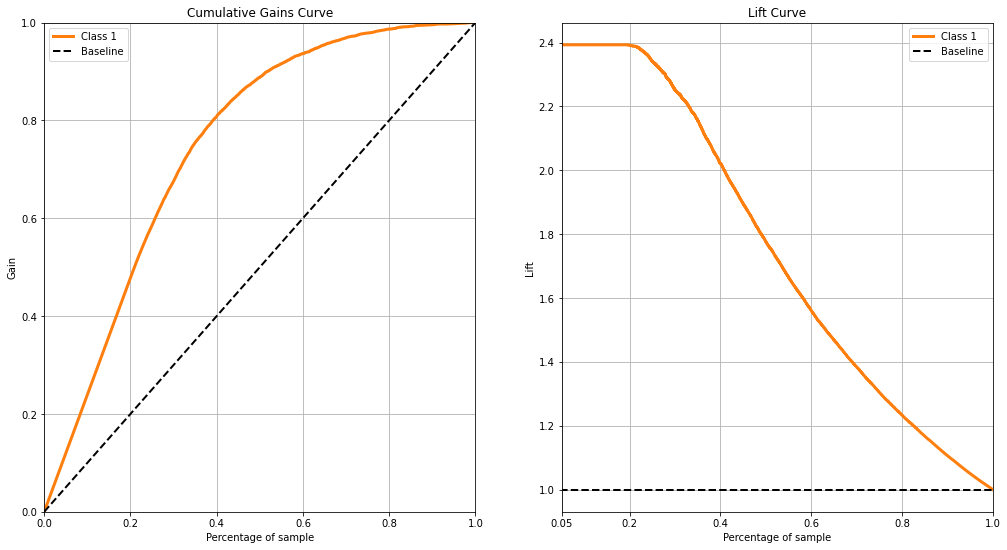

In [12]:
# Plot lift curves
predicted_probas = rf_plus.predict_proba(X_val)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_val, predicted_probas, ax=ax1)
plot_lift_curve(y_val, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()
